## Loading the Dataset

The dataset contains `10` features regarding 891 passengers aboard the Titanic. The target column defines whether or not a passenger survived, `0` for No and `1` for Yes.

In [203]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix


%matplotlib inline

In [145]:
# Read in data
data = Path("Titanic/clean_train.csv")
df_titanic = pd.read_csv(data)
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [146]:
# Create the features set (X) and the target set (y)
X = df_titanic.copy().drop("Survived", axis=1)
y = df_titanic["Survived"]
#y

In [173]:
# Plotting the non-linear data
#df_titanic.plot.scatter(x="Fare", y="Age", c="SibSp", colormap="winter")

## Data Preprocessing

In [148]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [180]:
#X_test

In [181]:
# Scale the data of the features set using the StandardScaler
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_scaled= X_scaler.transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

In [183]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
415,3,27.0,0,0,8.0500,1,0,0,0,1
139,1,24.0,0,0,79.2000,0,1,1,0,0
742,1,21.0,2,2,262.3750,1,0,1,0,0
824,3,2.0,4,1,39.6875,0,1,0,0,1
6,1,54.0,0,0,51.8625,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
700,1,18.0,1,0,227.5250,1,0,1,0,0
273,1,37.0,0,1,29.7000,0,1,1,0,0
375,1,27.0,1,0,82.1708,1,0,1,0,0
285,3,33.0,0,0,8.6625,0,1,1,0,0


## Neural Network Model 

In [151]:
# Create a shallow, 1 hidden layer, neural network
nn = Sequential()

# Hidden layer
nn.add(Dense(units=60, input_dim=10, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="sigmoid"))


In [152]:
# Model summary
nn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 60)                660       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 61        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [153]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [160]:
# Fit the model
model = nn.fit(X_train_scaled, y_train, epochs=150)

Epoch 1/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8548
Epoch 2/150
21/21 [==============================] - 0s 4ms/step - loss: 0.3642 - accuracy: 0.8563
Epoch 3/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3642 - accuracy: 0.8563
Epoch 4/150
21/21 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8548
Epoch 5/150
21/21 [==============================] - 0s 894us/step - loss: 0.3636 - accuracy: 0.8578
Epoch 6/150
21/21 [==============================] - 0s 886us/step - loss: 0.3644 - accuracy: 0.8518
Epoch 7/150
21/21 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8548
Epoch 8/150
21/21 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8578
Epoch 9/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8593
Epoch 10/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8548
Epoch

# Model Evaluation

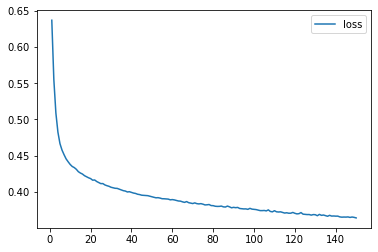

In [155]:
# Create a dataframe with the history dictionary
df_titanic_history = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df_titanic_history.plot(y="loss")

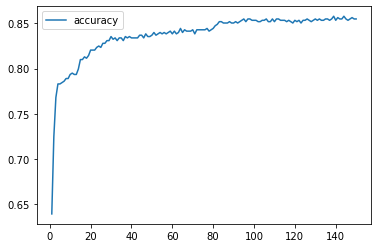

In [156]:
# Plot the accuracy
df_titanic_history.plot(y="accuracy")


In [157]:
# Evaluate the model using non-linear testing data
model_loss, model_accuracy = nn.evaluate(
    X_test_scaled, y_test
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 [==============================] - 0s 857us/step - loss: 0.3785 - accuracy: 0.8296
Loss: 0.3784525990486145, Accuracy: 0.8295964002609253


In [212]:
# Make predictions
model_predictions = nn.predict(X_test_scaled).round()


titanic_cm = confusion_matrix(y_test, model_predictions)
titanic_cm_df = pd.DataFrame(
    titanic_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix:")
print("")
print(titanic_cm_df)

Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0          127           16
Actual 1           22           58


In [196]:
report = classification_report(y_test, model_predictions, labels=[1,0])
print(report)

              precision    recall  f1-score   support

           1       0.78      0.72      0.75        80
           0       0.85      0.89      0.87       143

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223



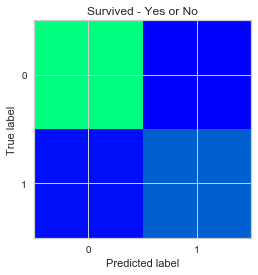

In [218]:

plt.imshow(titanic_cm, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['0','1']
plt.title('Survived - Yes or No')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
#
plt.show()